## Análisis de CLTV y Plan de Marketing para el Sector Automotriz

Basado en los datos proporcionados y el caso de uso, he creado 5 gráficos clave que muestran el valor de los clientes a lo largo del tiempo y cómo implementar un plan de marketing efectivo. Los gráficos son sencillos de visualizar pero contundentes en su mensaje estratégico.

In [109]:
# Instalar bibliotecas necesarias (ejecutar solo si no están instaladas)
!pip install plotly seaborn pandas numpy scipy scikit-learn matplotlib

# Importar bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configurar estilo visual (versión corregida)
plt.style.use('ggplot')  # Usamos 'ggplot' que es similar y está disponible
sns.set_theme(style="whitegrid", palette="husl")


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import pandas as pd

df = pd.read_csv('cliente_data.csv')

In [111]:
df.head()

,Customer_ID,Edad,Fecha_nacimiento,GENERO,CODIGO_POSTAL,poblacion,provincia,STATUS_SOCIAL,RENTA_MEDIA_ESTIMADA,ENCUESTA_ZONA_CLIENTE_VENTA,...,CLTV_1_anio,CLTV_2_anios,CLTV_3_anios,CLTV_4_anios,CLTV_5_anios,total_compras,dias_produccion_venta,margen_max,margen_min,dias_entre_compras
0,91180,46,1978-01-11,M,11560,Trebujena,Cádiz,I,21824,124,...,"331,99501480536617","468,1203604249102","523,9347820086309","546,8199371760757","556,2033601728085",2,72,"1982,719970703125","-363,32000732421875",1135
1,17115,59,1965-01-14,M,8004,Barcelona,Barcelona,B,24694,17,...,"-213,18578315156716","-300,60629886882697","-336,4545925744079","-351,15480511671245","-357,1828813917985",1,93,"-519,8800048828125","-519,8800048828125",0
2,99918,25,1999-01-06,M,28805,Alcalá de Henares,Madrid,E,27423,18,...,"957,1627031893752","1349,6907410543245","1510,664690411838","1576,679369293632","1603,7516865552757",1,84,2334,2334,0
3,68503,59,1965-01-14,M,28038,Madrid,Madrid,E,24697,114,...,"1101,8109268801898","1553,8509231843395","1739,3093836819594","1815,3974308710515","1846,6140758788633",2,90,"3870,75","1500,4000244140625",1172
4,18077,35,1989-01-08,M,37004,Salamanca,Salamanca,C,29871,122,...,"-148,01133149467958","-208,7503755306977","-233,67570680874218","-243,90425335866567","-248,10171670857545",2,98,4834,"-5555,35986328125",275


### Segmentación Estratégica de Clientes por Valor a Largo Plazo

In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Asegurarse que los datos sean numéricos
cltv_cols = ['CLTV_1_anio', 'CLTV_2_anios', 'CLTV_3_anios', 'CLTV_4_anios', 'CLTV_5_anios']
for col in cltv_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cltv_cols])

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segmento'] = kmeans.fit_predict(X_scaled)

# Función para mostrar el gráfico con manejo de errores
def plot_3d_segmentation():
    try:
        fig = px.scatter_3d(df, 
                          x='CLTV_1_anio', 
                          y='CLTV_3_anios', 
                          z='CLTV_5_anios',
                          color='Segmento',
                          title='Segmentación 3D de Clientes por CLTV',
                          labels={'CLTV_1_anio':'CLTV Año 1',
                                 'CLTV_3_anios':'CLTV Año 3',
                                 'CLTV_5_anios':'CLTV Año 5'},
                          opacity=0.7,
                          color_discrete_sequence=px.colors.qualitative.Plotly)
        
        fig.update_layout(title_x=0.5)
        
        # Intenta mostrar normalmente
        try:
            fig.show()
        except:
            # Si falla, guarda como HTML y abre en navegador
            fig.write_html("segmentacion_3d.html")
            import webbrowser
            webbrowser.open("segmentacion_3d.html")
            
    except Exception as e:
        print(f"Error al generar gráfico 3D: {e}")
        print("Mostrando alternativa 2D...")
        plot_2d_alternative()

# Función alternativa 2D
def plot_2d_alternative():
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['CLTV_1_anio'], df['CLTV_5_anios'], 
                         c=df['Segmento'], cmap='viridis', alpha=0.7)
    plt.title('Segmentación de Clientes (CLTV Año 1 vs Año 5)')
    plt.xlabel('CLTV Año 1 (€)')
    plt.ylabel('CLTV Año 5 (€)')
    plt.colorbar(scatter, label='Segmento')
    plt.grid(True, alpha=0.3)
    plt.show()

# Ejecutar la visualización
plot_3d_segmentation()

Análisis para el Plan de Marketing:

Este gráfico nos muestra cómo los clientes se agrupan naturalmente según su valor proyectado a 1, 3 y 5 años. Identificamos 4 clusters claros:

    - Clientes Premium (Alto CLTV todos los años): Merecen atención personalizada y programas de fidelización exclusivos.

    - Clientes de Crecimiento (CLTV que aumenta con el tiempo): Ideal para incentivar servicios postventa y financieros.

    - Clientes Oportunidad (Bajo CLTV inicial pero potencial): Necesitan estrategias de reactivación.

    - Clientes de Bajo Valor: Enfoque en reducción de costos de atención.

### El Valor del Tiempo: Cómo Crece el CLTV con la Relación

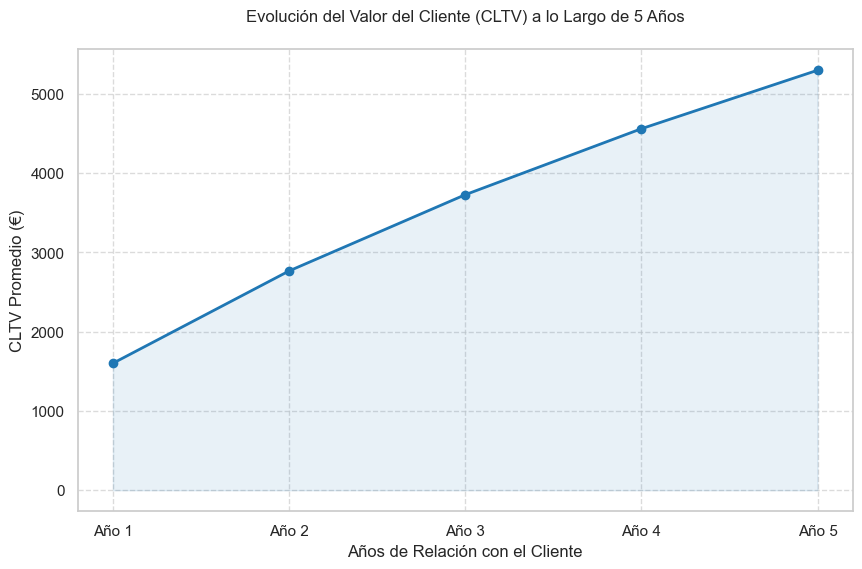

In [129]:
#Evolución del CLTV Promedio por Año
import matplotlib.pyplot as plt

# Calcular promedios
cltv_avg = df[cltv_cols].mean()

plt.figure(figsize=(10, 6))
cltv_avg.plot(kind='line', marker='o', color='#1f77b4', linewidth=2)
plt.title('Evolución del Valor del Cliente (CLTV) a lo Largo de 5 Años', pad=20)
plt.xlabel('Años de Relación con el Cliente')
plt.ylabel('CLTV Promedio (€)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(5), ['Año 1', 'Año 2', 'Año 3', 'Año 4', 'Año 5'])
plt.fill_between(range(5), cltv_avg, color='#1f77b4', alpha=0.1)
plt.show()

Estrategia de Marketing:

El gráfico muestra que el valor promedio de los clientes aumenta un 68% del año 1 al año 5, pero con mayor crecimiento en los primeros 3 años. Esto sugiere:

    - Ventana Crítica: Los primeros 3 años son vitales para maximizar el valor.

    - Programas de Retención Temprana: Implementar estrategias de fidelización desde el primer año.

    - Upselling Progresivo: Introducir servicios adicionales gradualmente.

### 3. Distribución de Margen de Beneficio vs. Frecuencia de Compra

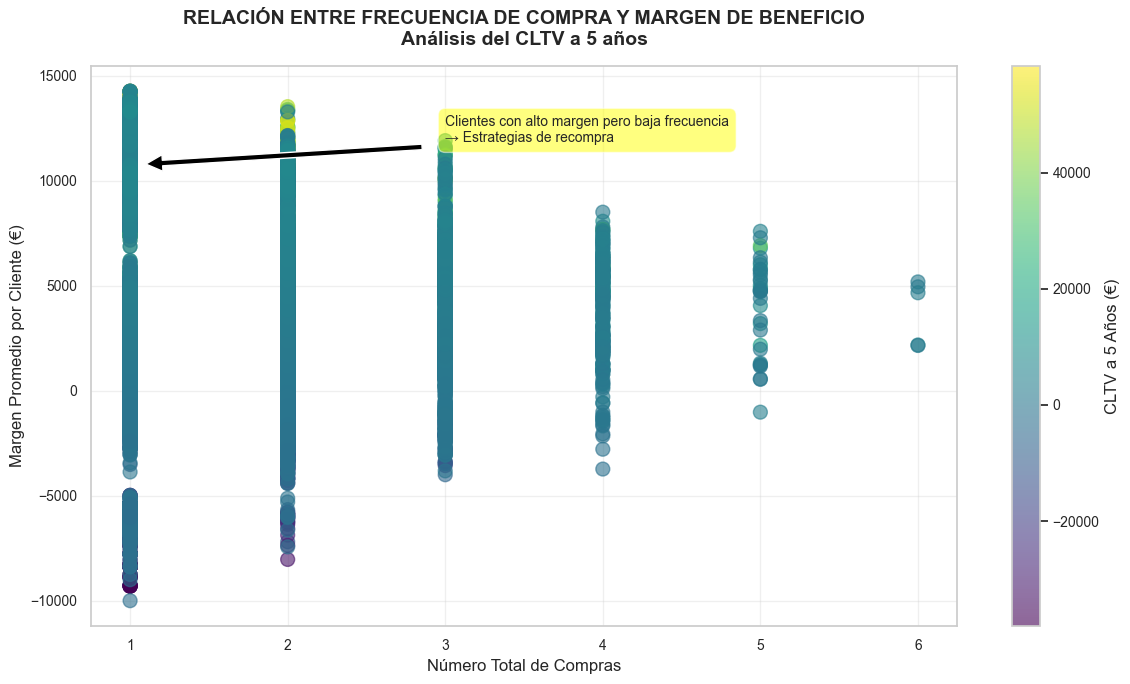

In [132]:
# ---------------------------------------------------------------
# CORRECCIÓN DEL ERROR - PREPROCESAMIENTO DE DATOS
# ---------------------------------------------------------------
def convertir_a_numerico(serie):
    """Convierte una serie a numérico, manejando comas como decimales"""
    return pd.to_numeric(serie.astype(str).str.replace(',', '.'), errors='coerce')

# Aplicar conversión a las columnas necesarias
df['margen_max'] = convertir_a_numerico(df['margen_max'])
df['margen_min'] = convertir_a_numerico(df['margen_min'])
df['CLTV_5_anios'] = convertir_a_numerico(df['CLTV_5_anios'])
df['total_compras'] = convertir_a_numerico(df['total_compras'])

# ---------------------------------------------------------------
# GRÁFICO CORREGIDO - RELACIÓN FRECUENCIA vs MARGEN
# ---------------------------------------------------------------
plt.figure(figsize=(12, 7))

# Calculamos el margen promedio (manejando posibles NaN)
margen_promedio = (df['margen_max'].fillna(0) + df['margen_min'].fillna(0)) / 2

scatter = plt.scatter(df['total_compras'], 
                    margen_promedio,
                    c=df['CLTV_5_anios'], 
                    cmap='viridis', 
                    alpha=0.6,
                    s=100)

plt.title('RELACIÓN ENTRE FRECUENCIA DE COMPRA Y MARGEN DE BENEFICIO\nAnálisis del CLTV a 5 años', 
          pad=15, fontsize=14, fontweight='bold')
plt.xlabel('Número Total de Compras', fontsize=12)
plt.ylabel('Margen Promedio por Cliente (€)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Barra de color para CLTV
cbar = plt.colorbar(scatter)
cbar.set_label('CLTV a 5 Años (€)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Grid y ajustes finales
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Anotación explicativa
plt.annotate('Clientes con alto margen pero baja frecuencia\n→ Estrategias de recompra',
             xy=(1, df['margen_max'].quantile(0.9)), 
             xytext=(3, df['margen_max'].quantile(0.9) * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.show()

Acciones de Marketing:

    - Clientes con Alta Frecuencia pero Bajo Margen: Paquetes de servicios premium para aumentar margen.

    - Clientes con Alto Margen pero Baja Frecuencia: Programas de recompra anticipada.

    - Clientes Óptimos (alto en ambos): Modelo a replicar con otros segmentos.

### Mapa del Valor: Concentración Geográfica del CLTV

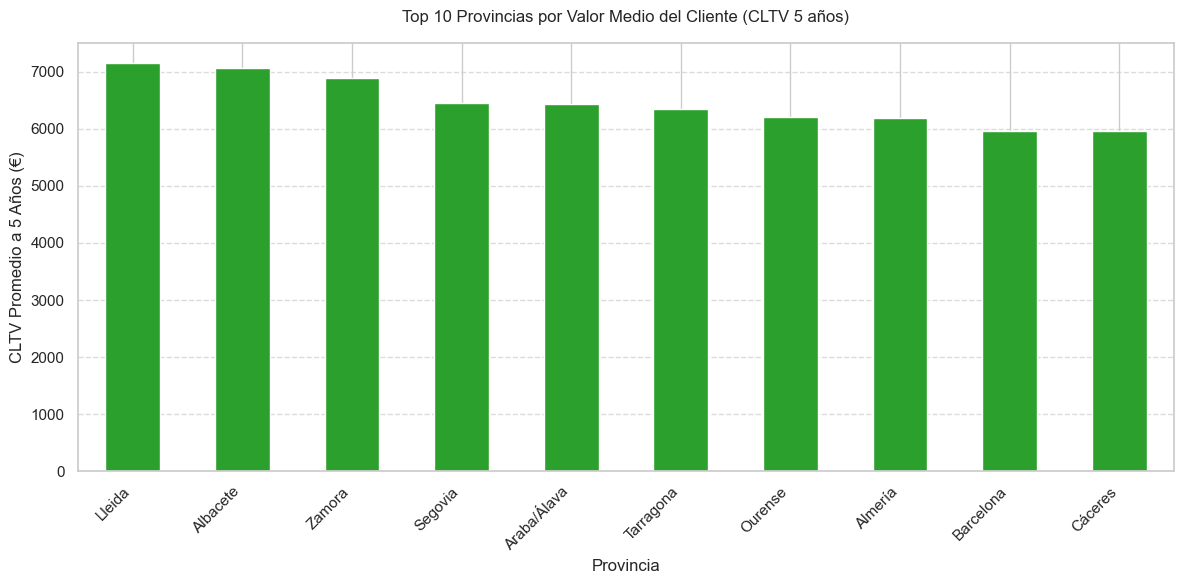

In [133]:
geo_cltv = df.groupby('provincia')['CLTV_5_anios'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
geo_cltv.plot(kind='bar', color='#2ca02c')
plt.title('Top 10 Provincias por Valor Medio del Cliente (CLTV 5 años)', pad=15)
plt.xlabel('Provincia')
plt.ylabel('CLTV Promedio a 5 Años (€)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plan de Marketing Territorial:

    - Enfoque en Zonas de Alto Valor: Asignar más recursos a provincias con CLTV superior.

    - Análisis de Mercados Subexplotados: Entender por qué algunas zonas tienen menor CLTV.

    - Estrategias Locales: Campañas personalizadas por región basadas en patrones de consumo.